Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "dmsavchenkova"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        value = 0
        for j in range(len(self.yk)):
          p1 = 1
          p2 = 1
          for i in range(len(self.xk)):
            if i == j:
              p1 = p1*1
              p2 = p2*1   
            else: 
              p1 = p1 * (x - self.xk[i])
              p2 = p2 * (self.xk[j] - self.xk[i])              
          value += self.yk[j] * p1/p2
        return value

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


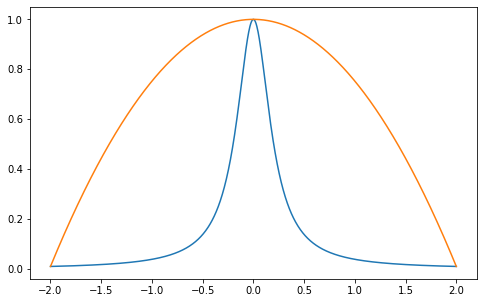

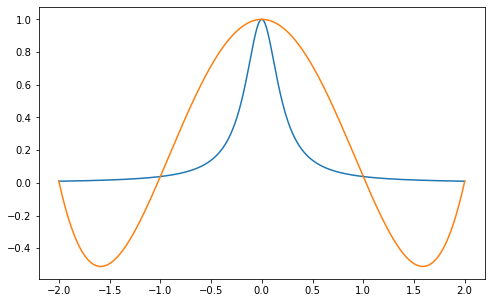

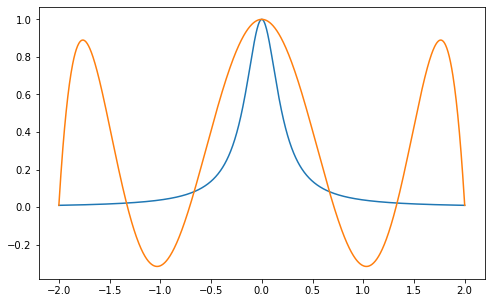

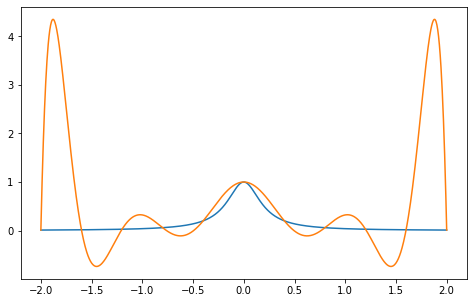

In [4]:
import matplotlib.pyplot as plt

t = np.linspace(-2, 2, 1000) 
for m in [3, 5, 7, 11]:
  plt.figure(figsize=(8,5))

  plt.plot(t, runge_func(t))

  nodes = np.linspace(-2, 2, m)
  plt.plot(t, [LagrangeInterpolator(nodes, runge_func(nodes))(_) for _ in t])

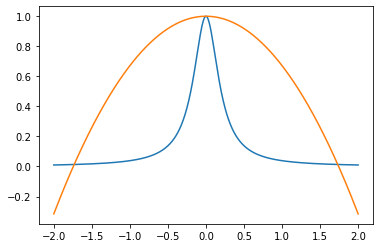

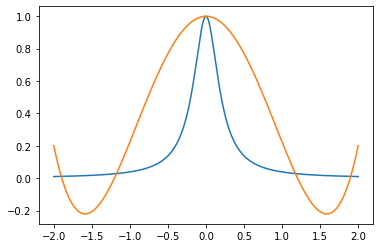

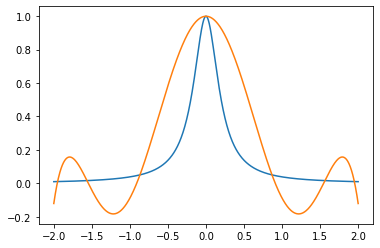

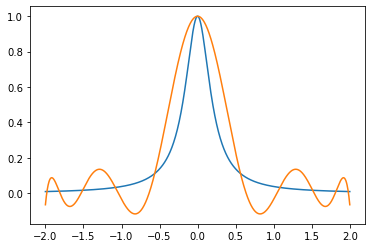

In [5]:
def cheb(a, b, m):
    return [1/2*(a+b) + 1/2*(b-a)*np.cos(np.pi * (2*k - 1) / (2*m)) for k in range(1, m+1)]


for m in [3, 5, 7, 11]:
  plt.plot(t, runge_func(t))

  nodes = np.array(cheb(-2, 2, m))
  lagr = LagrangeInterpolator(nodes, runge_func(nodes))
  plt.plot(t, [lagr(_) for _ in t])
  plt.show()